# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [211]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [212]:
websites = pd.read_csv('../website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [213]:
# What the dataset looks like?

print(websites.head())

       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0           NaN            NaN   
1          Apache/2.4.10         15087.0           NaN            NaN   
2  Microsoft-HTTPAPI/2.0           324.0           NaN            NaN   
3                  nginx           162.0            US             AK   
4                    NaN        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21                NaN  ...                     0           2   
1       

In [214]:
# What are the data types?

websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [215]:
# Which columns contain the features of the websites?
# The column 'Type' does not contain features of the website

website_features = websites.columns.drop('Type')
new_df = websites[website_features]
print(new_df)

          URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0      M0_109          16                          7  iso-8859-1   
1     B0_2314          16                          6       UTF-8   
2      B0_911          16                          6    us-ascii   
3      B0_113          17                          6  ISO-8859-1   
4      B0_403          17                          6       UTF-8   
...       ...         ...                        ...         ...   
1776    M4_48         194                         16       UTF-8   
1777    M4_41         198                         17       UTF-8   
1778   B0_162         201                         34       utf-8   
1779  B0_1152         234                         34  ISO-8859-1   
1780   B0_676         249                         40       utf-8   

                      SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                      nginx           263.0           NaN            NaN   
1              Apache/2.4.10 

In [216]:
non_website_features = websites['Type']
print(non_website_features)

0       1
1       0
2       0
3       0
4       0
       ..
1776    1
1777    1
1778    0
1779    0
1780    0
Name: Type, Length: 1781, dtype: int64


In [217]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

# Answer: The column is 'Type'. 1 represents malicious websites and 0 represents benign websites.

In [218]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

# Identify categorical columns
categorical_columns = [column for column in websites.columns if websites[column].dtype == 'object']

# Print categorical columns to decide on further action
print("Categorical columns:")
print(categorical_columns)

# Convert date columns to datetime format
websites['WHOIS_REGDATE'] = pd.to_datetime(websites['WHOIS_REGDATE'], errors='coerce', dayfirst=True)
websites['WHOIS_UPDATED_DATE'] = pd.to_datetime(websites['WHOIS_UPDATED_DATE'], errors='coerce', dayfirst=True)

# Print DataFrame to review changes and ensure no unintended transformations
print(websites.head())

# Print DataFrame to confirm transformations
print(websites.head())

Categorical columns:
['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0           NaN            NaN   
1          Apache/2.4.10         15087.0           NaN            NaN   
2  Microsoft-HTTPAPI/2.0           324.0           NaN            NaN   
3                  nginx           162.0            US             AK   
4                    NaN        124140.0            US             TX   

        WHOIS_REGDATE  WHOIS_UPDATED_DATE  ...

In [219]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

In [220]:

# First, we make sure to only consider numerical columns for the correlation
numerical_columns = [column for column in websites.columns if websites[column].dtype in ['int64', 'float64']]
correlation_matrix = websites[numerical_columns].corr()
print(correlation_matrix)

                           URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSATION_EXCHANGE   -0.038407                  -0.037459   
DIST_REMOTE_TCP_PORT        -0.039839                  -0.042619   
REMOTE_IPS                  -0.046367                  -0.047103   
APP_BYTES                   -0.026446                  -0.023914   
SOURCE_APP_PACKETS          -0.042264                  -0.040096   
REMOTE_APP_PACKETS          -0.033779                  -0.030597   
SOURCE_APP_BYTES            -0.014857                  -0.014376   
REMOTE_APP_BYTES            -0.026686                  -0.024098   
APP_PACKETS                 -0.042264                  -0.040096   
DNS_QUERY_TIMES             -0.068582                  -0.050048   
Type                         0.162104           

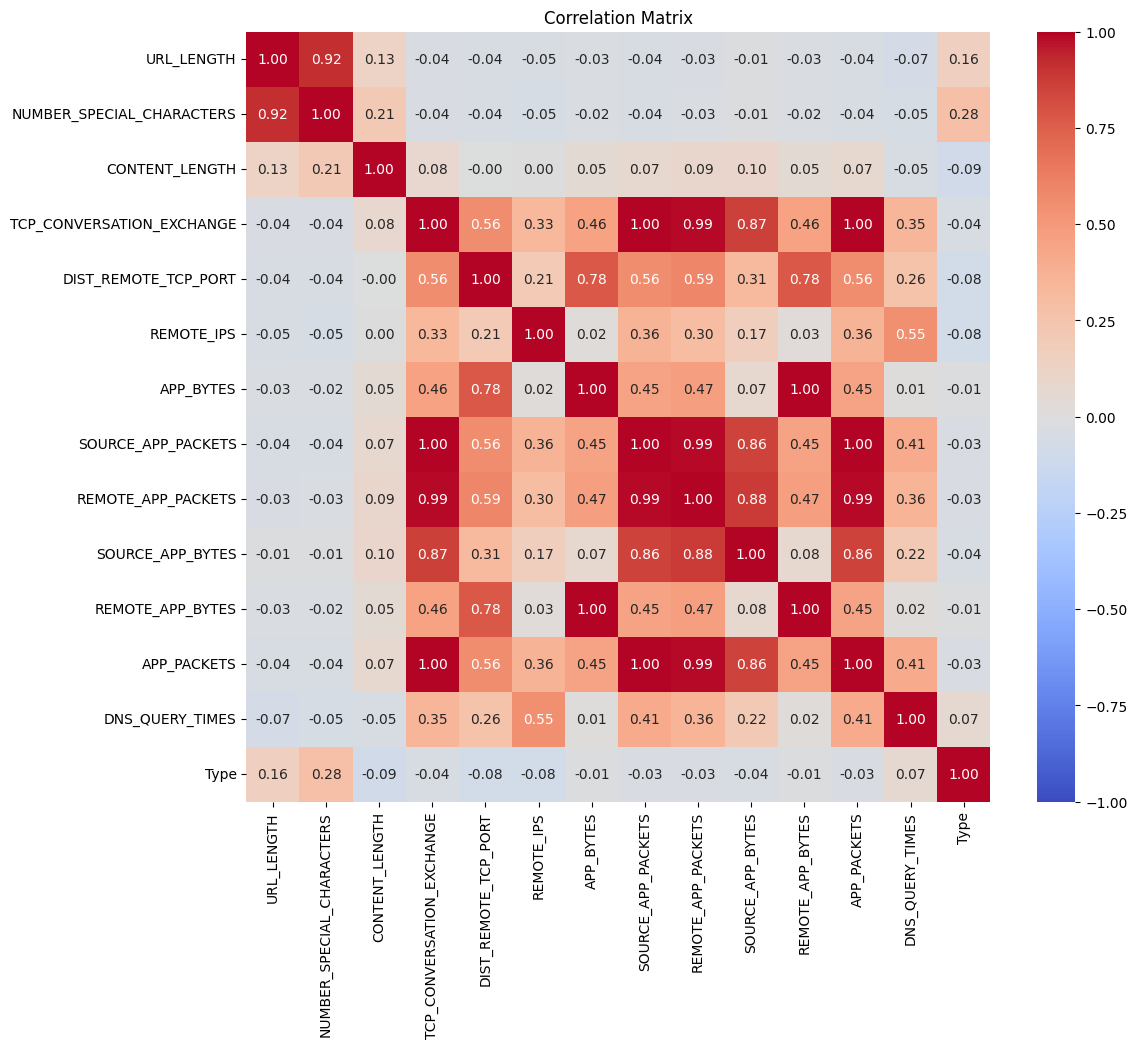

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a colour map for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [222]:
# Identify columns with high colinearity

"""
Observa el mapa de calor para identificar pares de columnas con alta correlación. Generalmente, se considera que una correlación absoluta mayor que 0.7 o 0.8 indica alta colinealidad.
Columna A y Columna B con una alta correlación (por ejemplo, 0.9) sugieren que las dos columnas contienen información redundante.
Puedes considerar eliminar una de las dos columnas para reducir la colinealidad y simplificar el modelo.
"""

# Columns with a high collinearity include URL_LENGTH and NUMBER_SPECIAL_CHARACTERS, REMOTE_APP_PACKETS and TCO_CONVERSATION_EXCHANGE, and more.

'\nObserva el mapa de calor para identificar pares de columnas con alta correlación. Generalmente, se considera que una correlación absoluta mayor que 0.7 o 0.8 indica alta colinealidad.\nColumna A y Columna B con una alta correlación (por ejemplo, 0.9) sugieren que las dos columnas contienen información redundante.\nPuedes considerar eliminar una de las dos columnas para reducir la colinealidad y simplificar el modelo.\n'

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [223]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [224]:
xgb.fit(X,y)
sort_idx = xgb.feature_importances_.argsort()
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show();

NameError: name 'xgb' is not defined

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [ ]:
# Function to create and display the heatmap
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
    plt.title(title)
    plt.show()

# Set the threshold for high correlation
threshold = 0.90

# List to keep track of removed columns
removed_columns = []

# Iteratively remove columns with high correlation
while True:
    # Identify pairs of columns with high correlation
    corr_pairs = correlation_matrix.abs().stack().reset_index()
    corr_pairs.columns = ['col1', 'col2', 'correlation']
    corr_pairs = corr_pairs[corr_pairs['col1'] != corr_pairs['col2']]
    high_corr_pairs = corr_pairs[corr_pairs['correlation'] > threshold]

    if high_corr_pairs.empty:
        break

    # Select the first column of the pair to remove (this can be adjusted as needed)
    col_to_remove = high_corr_pairs.iloc[0]['col2']
    print(f'Removing column: {col_to_remove} with correlation: {high_corr_pairs.iloc[0]["correlation"]:.2f}')
    websites = websites.drop(columns=[col_to_remove])
    removed_columns.append(col_to_remove)

    # Update the list of numerical columns
    numerical_columns = [column for column in websites.columns if websites[column].dtype in ['int64', 'float64']]

    # Recreate the correlation matrix
    correlation_matrix = websites[numerical_columns].corr()

    # Plot the updated heatmap
    plot_heatmap(correlation_matrix, f'Correlation Matrix after removing {col_to_remove}')

print(f'Columns removed due to high collinearity: {removed_columns}')

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [ ]:
# Examine the number of missing values in each column
missing_values = websites.isnull().sum()

# Show the number of missing values
print(missing_values)

In [ ]:
# First we will drop the columns with more than 50% of missing data

# Calculate percentage of missing data from each column
missing_percentage = websites.isnull().mean()*100

# Identify columns with more than 50% missing data
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Drop columns with more than 50% missing values

websites_cleaned = websites.drop(columns = columns_to_drop)

# Display columns to drop
print("Columns dropped due to more than 50% missing values:")
print(columns_to_drop)

# Output indicates no columns had more than 50% missing data

print(missing_percentage)

In [ ]:
# Drop rows with missing data
rows_before_dropping = websites_cleaned.shape[0]
websites_cleaned = websites_cleaned.dropna()

# Display shape of the DataFrame before and after dropping rows
print(f"\nNumber of rows before dropping rows with missing data: {rows_before_dropping}")
print(f"Number of rows after dropping rows with missing data: {websites_cleaned.shape[0]}")

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [230]:
# Examine the number of missing values in each column
missing_values = websites_cleaned.isnull().sum()
print(missing_values)

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [231]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
BS                   4
ru                   4
AT                   4
HK                   3
us                   3
TR                   3
BE                   3
DE                   3
SC                   3
KY                   3
SE                   3
BR                   2
UY                   2
Cyprus               2
SI                   2
UA                   2
RU                   2
IL                   2
NO                   2
KG                   2
TH                   1
se                   1
LV                   1
LU                   1
United Kingdom       1
UG                  

In [232]:
# Display unique values in the 'WHOIS_COUNTRY' column
unique_values = websites['WHOIS_COUNTRY'].unique()
print("Unique values in 'WHOIS_COUNTRY':")
print(unique_values)

Unique values in 'WHOIS_COUNTRY':
[nan 'US' 'SC' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'se' 'IN' 'LU' 'TH'
 "[u'GB'; u'UK']" 'FR' 'NL' 'UG' 'JP' 'CN' 'SE' 'SI' 'IL' 'ru' 'KY' 'AT'
 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV' 'DE' 'ES' 'BR' 'us' 'KR' 'HK' 'UA' 'CH'
 'United Kingdom' 'BS' 'PK' 'IT' 'Cyprus' 'BY' 'AE' 'IE' 'UY' 'KG']


In [233]:
# Define the mapping dictionary
good_country = {
    'None': 'None',
    'US': 'US', 
    'SC': 'SC', 
    'GB': 'UK', 
    'UK': 'UK', 
    'RU': 'RU', 
    'AU': 'AU', 
    'CA': 'CA',
    'PA': 'PA',
    'se': 'SE', 
    'IN': 'IN',
    'LU': 'LU', 
    'TH': 'TH', 
    "[u'GB'; u'UK']": 'UK', 
    'FR': 'FR',
    'NL': 'NL',
    'UG': 'UG', 
    'JP': 'JP', 
    'CN': 'CN', 
    'SE': 'SE',
    'SI': 'SI', 
    'IL': 'IL', 
    'ru': 'RU', 
    'KY': 'KY', 
    'AT': 'AT', 
    'CZ': 'CZ', 
    'PH': 'PH', 
    'BE': 'BE', 
    'NO': 'NO', 
    'TR': 'TR', 
    'LV': 'LV',
    'DE': 'DE', 
    'ES': 'ES', 
    'BR': 'BR', 
    'us': 'US', 
    'KR': 'KR', 
    'HK': 'HK', 
    'UA': 'UA', 
    'CH': 'CH', 
    'United Kingdom': 'UK',
    'BS': 'BS', 
    'PK': 'PK', 
    'IT': 'IT', 
    'Cyprus': 'CY', 
    'BY': 'BY', 
    'AE': 'AE', 
    'IE': 'IE', 
    'UY': 'UY', 
    'KG': 'KG'
}

# Apply the mapping, handle NaN values
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].map(good_country).fillna('Unknown')

# Display the cleaned 'WHOIS_COUNTRY' column
print("Cleaned 'WHOIS_COUNTRY' values:")
print(websites['WHOIS_COUNTRY'].value_counts())

Cleaned 'WHOIS_COUNTRY' values:
WHOIS_COUNTRY
US         1106
Unknown     306
CA           84
ES           63
UK           35
AU           35
PA           21
JP           11
CN           10
IN           10
FR            9
CZ            9
NL            6
CH            6
RU            6
KR            5
AT            4
SE            4
BS            4
PH            4
BE            3
HK            3
TR            3
DE            3
KY            3
SC            3
UA            2
CY            2
UY            2
KG            2
BR            2
NO            2
IL            2
SI            2
LV            1
PK            1
IT            1
LU            1
BY            1
AE            1
IE            1
UG            1
TH            1
Name: count, dtype: int64


In [234]:
websites.WHOIS_COUNTRY.unique()

array(['Unknown', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [235]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

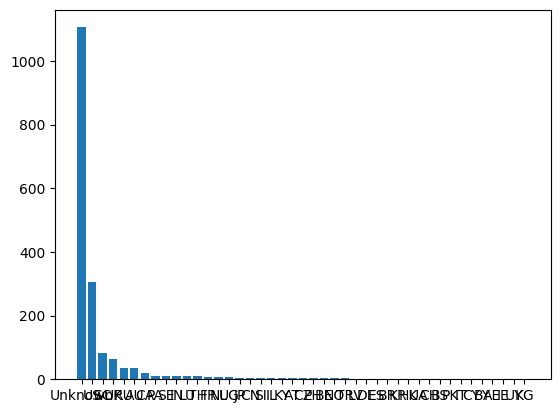

<Figure size 1500x1500 with 0 Axes>

In [236]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [237]:
# Step 1: Identify the top 10 most frequent values
top_10_values = websites['WHOIS_COUNTRY'].value_counts().nlargest(10).index

# Step 2: Replace other values with 'OTHER'
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_values else 'OTHER')

# Display the cleaned DataFrame
print("Cleaned 'WHOIS_COUNTRY' values:")
print(websites['WHOIS_COUNTRY'].value_counts())

Cleaned 'WHOIS_COUNTRY' values:
WHOIS_COUNTRY
US         1106
Unknown     306
OTHER       100
CA           84
ES           63
UK           35
AU           35
PA           21
JP           11
IN           10
CN           10
Name: count, dtype: int64


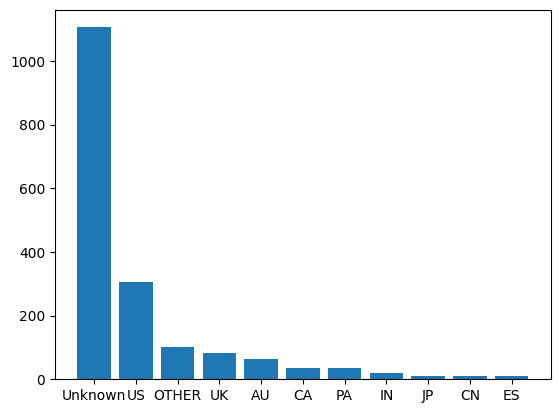

<Figure size 1500x1500 with 0 Axes>

In [238]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [239]:
columns_to_remove = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']

# Drop columns in-place
websites.drop(columns=columns_to_remove, inplace=True)

# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [240]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [241]:
websites.drop(columns = 'URL')

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,Unknown,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,Unknown,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,Unknown,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,NaN,124140.0,US,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,NaN,ES,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,UTF-8,Apache,NaN,ES,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,0,0,0,0,0,0,0,0,0,0.0,0


#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [242]:
websites.CHARSET.value_counts()

CHARSET
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [243]:
websites.SERVER.value_counts()

SERVER
Apache                                                       386
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [244]:
# Identify categorical columns
categorical_columns = [column for column in websites.columns if websites[column].dtype == 'object']

# Apply pd.get_dummies()to the categorical columnss y and delete the first column of each category
websites_dummy = pd.get_dummies(websites, columns=categorical_columns, drop_first=True)

print(websites_dummy.head())

   URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
0          16                          7           263.0   
1          16                          6         15087.0   
2          16                          6           324.0   
3          17                          6           162.0   
4          17                          6        124140.0   

   TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0                          7                     0           2        700   
1                         17                     7           4       1230   
2                          0                     0           0          0   
3                         31                    22           3       3812   
4                         57                     2           5       4278   

   SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  ...  \
0                   9                  10              1153  ...   
1                  17                  1

Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [245]:
print(f"Forma del DataFrame después de aplicar get_dummies: {websites_dummy.shape}")

Forma del DataFrame después de aplicar get_dummies: (1781, 2048)


# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [246]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = websites_dummy.drop('Type', axis=1)  # Features
y = websites_dummy['Type']               # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,    # 20% of the data for testing
    random_state=42    # Seed for reproducibility
)

#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [247]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Print the model to verify
print(logistic_model)

LogisticRegression(max_iter=1000, random_state=42)


A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [248]:
# Drop rows with missing values from X_train and y_train
X_train_clean = X_train.dropna()
y_train_clean = y_train.loc[X_train_clean.index]

# Fit the model with the cleaned training data
logistic_model.fit(X_train_clean, y_train_clean)

# Print confirmation
print("Logistic Regression model has been trained.")

Logistic Regression model has been trained.


/Users/kurtiswalton/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [250]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict the target values for the test set
y_pred = logistic_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:")
print(accuracy)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [258]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with max_depth=3
decision_tree_model = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Compute the confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Compute the accuracy score
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Print the confusion matrix and accuracy score
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_tree)
print("\nAccuracy Score for Decision Tree:")
print(accuracy_tree)

Confusion Matrix for Decision Tree:
[[306   0]
 [ 30  21]]

Accuracy Score for Decision Tree:
0.9159663865546218


Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [259]:
# Calculate the predicted probabilities for the test set
y_pred_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Convert probabilities to class predictions using a threshold of 0.5
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Compute the confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_class)

# Compute the accuracy score
accuracy_tree = accuracy_score(y_test, y_pred_class)

# Print the confusion matrix and accuracy score
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_tree)
print("\nAccuracy Score for Decision Tree:")
print(accuracy_tree)

Confusion Matrix for Decision Tree:
[[306   0]
 [ 30  21]]

Accuracy Score for Decision Tree:
0.9159663865546218


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [260]:
# Initialize the Decision Tree Classifier with max_depth=5
decision_tree_model = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Compute the confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Compute the accuracy score
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Print the confusion matrix and accuracy score
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_tree)
print("\nAccuracy Score for Decision Tree:")
print(accuracy_tree)

Confusion Matrix for Decision Tree:
[[306   0]
 [ 30  21]]

Accuracy Score for Decision Tree:
0.9159663865546218


¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

Answer: There is no change in the accuracy score.

### Conclusión:

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [ ]:
# Your code here

## Conclusiones:

Add your comments here: